<a href="https://colab.research.google.com/github/hongkwangpyo/2020_deep_learning/blob/master/0812_5_keras_callback.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 경사하강법
  - sgd = 확률적 경사하강법, 데이터에서 일부를 추출해서 경사하강법을 시행하는 방식
  - momentum = 관성을 고려해서 진동과 폭을 조정하는 방식
  - adagrad = 변수의 업데이트각 잦으면 학습률을 적게하면서 이동 보폭을 조절하는 방법
  - rmsprop = adagrad를 수정해서 민감도를 보완한 방법
  - adam = momentum과 rmsprop을 결합해서 만든 방법

- loss func
- mse - regression
- binary_crossentropy - binary classification
- categorical_crossentropy - multi classification

# activation func

In [ ]:
from IPython.display import Image
Image(filename='activation-functions.png') 

In [2]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine.csv


In [3]:
data = 'wine.csv'

In [14]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder

import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns

from keras.callbacks import ModelCheckpoint
import os

np.random.seed(3)
tf.random.set_seed(3)

In [5]:
df = pd.read_csv(data, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [6]:
dataset = df.values
x = dataset[:, :12]
y = dataset[:, 12]

In [19]:
model = Sequential()
model.add(Dense(30, input_dim = 12, activation = 'relu'))
model.add(Dense(12, activation = 'relu'))
model.add(Dense(8, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [20]:
model.compile(loss='binary_crossentropy',
              optimizer = 'adam',
              metrics= ['accuracy'])

In [21]:
MODEL_DIR = './model'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

In [22]:
modelpath = "./model/{epoch:02d}-{val_loss:4f}.hdf5"
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose=1, save_best_only=True)

In [ ]:
hist = model.fit(x,y,validation_split=0.2, epochs=200, verbose=0, callbacks=[checkpointer])

In [24]:
!ls './model/'

01-0.158404.hdf5  05-0.115939.hdf5  13-0.052263.hdf5  18-0.030669.hdf5
01-0.171748.hdf5  06-0.050383.hdf5  14-0.051902.hdf5  28-0.018280.hdf5
02-0.079469.hdf5  06-0.064677.hdf5  15-0.041750.hdf5  37-0.017679.hdf5
02-0.123092.hdf5  09-0.047143.hdf5  16-0.018707.hdf5  40-0.029873.hdf5
05-0.062390.hdf5  10-0.057313.hdf5  16-0.032271.hdf5  64-0.014815.hdf5


In [25]:
model.save('wine_model.h5')

In [26]:
model1 = load_model('wine_model.h5')

In [27]:
model1.evaluate(x,y)

204/204 [==============================] - 0s 853us/step - loss: 0.0536 - accuracy: 0.9851


[0.05364684388041496, 0.9850700497627258]

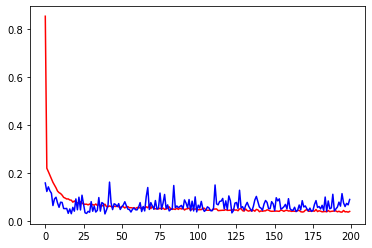

In [28]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'], c= 'r')
plt.plot(hist.history['val_loss'], c= 'b')

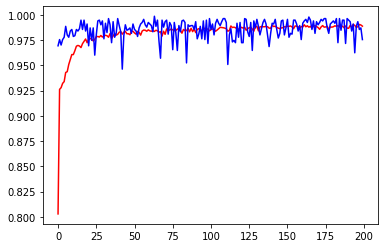

In [29]:
plt.plot(hist.history['accuracy'], c= 'r')
plt.plot(hist.history['val_accuracy'], c= 'b')

In [30]:
!ls './model/'

01-0.158404.hdf5  05-0.115939.hdf5  13-0.052263.hdf5  18-0.030669.hdf5
01-0.171748.hdf5  06-0.050383.hdf5  14-0.051902.hdf5  28-0.018280.hdf5
02-0.079469.hdf5  06-0.064677.hdf5  15-0.041750.hdf5  37-0.017679.hdf5
02-0.123092.hdf5  09-0.047143.hdf5  16-0.018707.hdf5  40-0.029873.hdf5
05-0.062390.hdf5  10-0.057313.hdf5  16-0.032271.hdf5  64-0.014815.hdf5


In [31]:
model2 = load_model('./model/28-0.018280.hdf5')

In [32]:
model2.evaluate(x,y)

204/204 [==============================] - 0s 823us/step - loss: 0.0825 - accuracy: 0.9728


[0.08249183744192123, 0.9727566838264465]

In [ ]:
model.save('wine_model.h5')

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('wine_model.h5')

In [ ]:
model1.evaluate(x,y)

204/204 [==============================] - 0s 862us/step - loss: 0.0388 - accuracy: 0.9900


[0.03882523253560066, 0.9899953603744507]